In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 🎲 Cargar dataset
# Reemplazá esta línea por tu ruta real
df = pd.read_json('../data/raw/900k Definitive Spotify Dataset.json', lines=True)

# 🧹 Selección de features numéricos relevantes para estilo sonoro
features = [
    'Tempo', 'Loudness (db)', 'Energy', 'Danceability', 'Positiveness',
    'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
    'Good for Party', 'Good for Work/Study', 'Good for Relaxation/Meditation',
    'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching',
    'Good for Driving', 'Good for Social Gatherings', 'Good for Morning Routine'
]

In [2]:
# 🧼 Filtrar dataset (sin nulos en esas columnas)
df = df.dropna(subset=features)

# 🔄 Normalizar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [3]:

# 🎯 Entrenar modelo KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [4]:
# 🔍 Reducción PCA para visualizar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

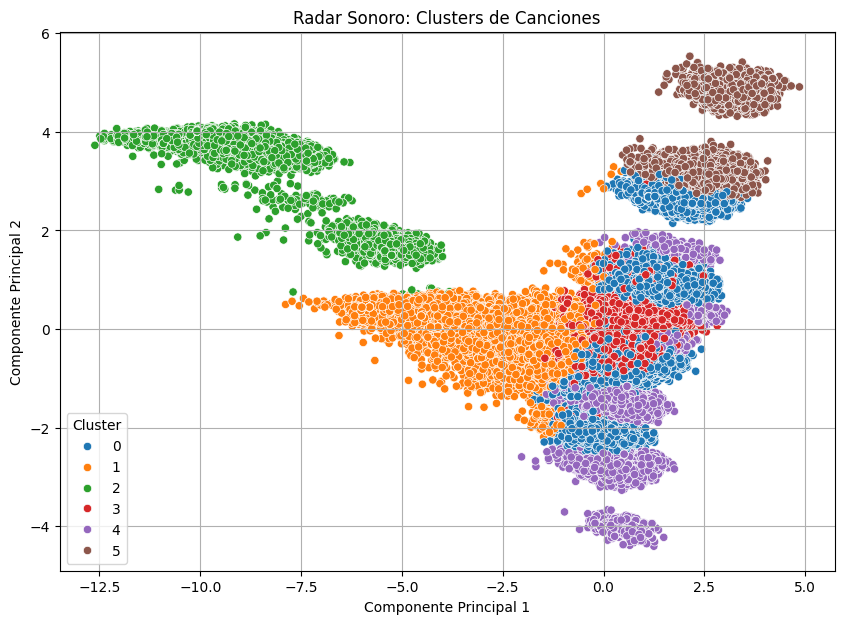

In [5]:
# 🎨 Visualizar radar sonoro
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("Radar Sonoro: Clusters de Canciones")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [6]:
# 🔍 Agrupamos por cluster y sacamos el promedio de los features
cluster_summary = df.groupby("cluster")[features].mean().round(2)

# Mostramos los valores medios por cluster
cluster_summary.T  # Transpuesta para ver mejor


cluster,0,1,2,3,4,5
Tempo,0.50,0.52,0.28,0.57,0.50,0.75
Loudness (db),0.78,0.69,0.64,0.80,0.77,0.81
Energy,66.93,34.64,21.37,78.24,60.65,82.29
Danceability,70.84,53.13,42.77,43.64,71.60,63.21
Positiveness,59.60,35.54,27.32,37.40,52.19,61.47
Speechiness,16.65,6.55,4.48,8.44,9.50,15.70
Liveness,18.56,16.21,15.98,24.56,17.35,21.05
Acousticness,18.24,64.53,83.46,8.07,15.40,12.16
Instrumentalness,2.70,11.13,16.07,10.64,5.52,4.75
Good for Party,0.09,0.00,0.00,0.00,0.05,0.29


In [7]:
cluster_names = {
    0: "Ambient Equilibrado",
    1: "Chill & Acústico",
    2: "Dance & Study Flow",
    3: "Pop Versátil",
    4: "Upbeat & Urbano"
}
df["estilo"] = df["cluster"].map(cluster_names)


In [9]:
# Ver cuántas canciones hay en cada estilo
print(df["estilo"].value_counts())


estilo
Ambient Equilibrado    182058
Pop Versátil           142800
Chill & Acústico        98658
Upbeat & Urbano         32234
Dance & Study Flow      15806
Name: count, dtype: int64


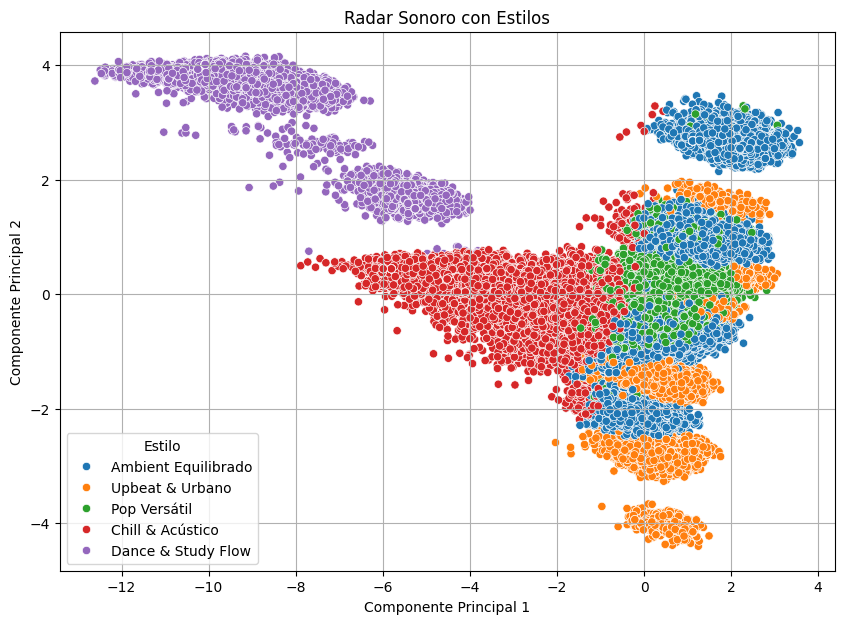

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='estilo', palette='tab10')
plt.title("Radar Sonoro con Estilos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Estilo")
plt.grid(True)
plt.show()


In [11]:
import joblib
import os

# 📁 Crear carpeta si no existe
os.makedirs("models", exist_ok=True)

# 💾 Guardar el modelo KMeans
joblib.dump(kmeans, "../models/kmeans_model.pkl")

# 💾 Guardar el scaler (StandardScaler)
joblib.dump(scaler, "../models/kmeans_scaler.pkl")

print("✅ Modelos guardados en la carpeta 'models/'")


✅ Modelos guardados en la carpeta 'models/'
